In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two images as 6x6 matrices
A1 = [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0], [0, 0, 0, 9, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 5]]
A2 = [[0, 1, 0, 0, 0, 0], [1, 10, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

# Convert lists to numpy arrays for easier manipulation
A1 = np.array(A1)
A2 = np.array(A2)

In [23]:
def calculate_correlation(image1, image2):
    # Assuming image1 and image2 are square matrices of the same size
    # Get the dimensions of the images
    D_I = image1.shape[0]
    r = np.arange(-D_I // 2, D_I // 2)
    s = np.arange(-D_I // 2, D_I // 2)

    # Initialize the correlation matrix
    C = np.zeros((D_I, D_I))

    # Calculate the correlation
    for i in range(D_I):
        for j in range(D_I):
            if image1[i][j] != 0:
                for r_index, v in enumerate(r):
                    if (i + v) >= 0 and (i + v) < D_I:
                        for u_index, u in enumerate(s):
                            if (j + u) >= 0 and (j + u) < D_I:
                                C[r_index][u_index] += image1[i][j] * image2[i + v][j + u]
    return C


Correlation Matrix:
[[  2.  20.  11.   1.   0.   0.]
 [ 19. 119.  10.   0.   0.   0.]
 [  3.  29.   2.   5.   5.   0.]
 [  0.   2.   5.  45.   0.   0.]
 [  0.   0.   0.  10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]]


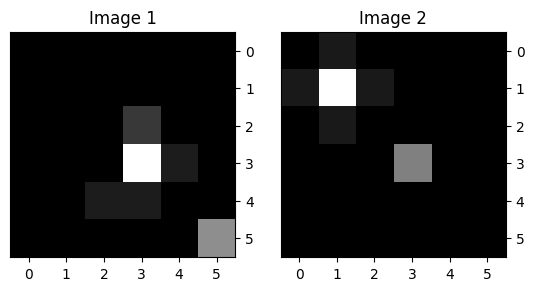

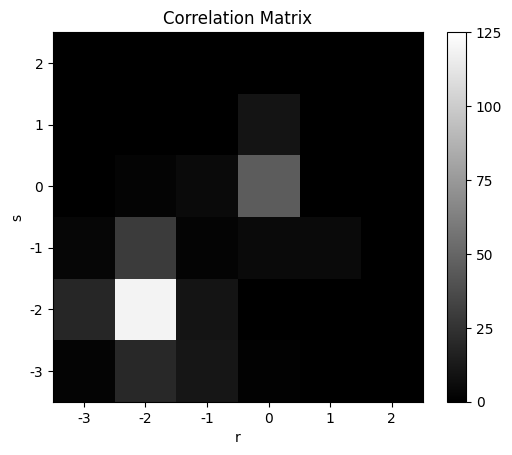

In [30]:
# Calculate the correlation matrix
correlation_matrix = calculate_correlation(A1, A2)
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the images
plt.subplot(1, 2, 1)
plt.title("Image 1")
plt.imshow(A1, cmap='gray')
plt.xticks(np.arange(A1.shape[0]))
plt.gca().yaxis.set_ticks_position('right')
plt.subplot(1, 2, 2)
plt.title("Image 2")
plt.imshow(A2, cmap='gray')
plt.xticks(np.arange(A1.shape[0]))
plt.gca().yaxis.set_ticks_position('right')
plt.show()

# Get the dimensions of the correlation matrix
D = correlation_matrix.shape[0]
center = D // 2
ticks = np.arange(D) - center

# Plot the correlation matrix with centered axes and labels
plt.figure()
plt.title("Correlation Matrix")
im = plt.imshow(correlation_matrix, cmap='gray', origin='lower', vmin=0, vmax=125)
# Adjust ticks to be centered around 0
plt.xticks(np.arange(D), ticks)
plt.yticks(np.arange(D), ticks)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().yaxis.set_label_position('left')
plt.xlabel('r')
plt.ylabel('s')
# Colorbar with ticks at 0,25,...,125
plt.colorbar(im, fraction=0.046, pad=0.05, ticks=np.arange(0,126,25))
plt.show()